**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**loading the data set**

In [2]:
data=pd.read_csv("/content/Module2.dataset.csv")
data.head()

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603


**About the data**

In [4]:
data.describe()

,National Waterways- I,National Waterways- II,National Waterways-III,Total
count,11.000000,11.000000,11.000000,11.000000
mean,9060.727273,520.454545,137.727273,9718.909091
std,5499.343763,440.443041,36.548847,5528.720475
min,1596.000000,74.000000,89.000000,2111.000000
25%,4956.000000,309.000000,112.500000,5959.500000
50%,7092.000000,422.000000,139.000000,7680.000000
75%,13424.000000,587.000000,151.500000,14154.000000
max,18512.000000,1728.000000,219.000000,19222.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   YEAR                    11 non-null     object
 1   National Waterways- I   11 non-null     int64 
 2   National Waterways- II  11 non-null     int64 
 3   National Waterways-III  11 non-null     int64 
 4   Total                   11 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 572.0+ bytes


**Null values**

In [6]:
data.isna().sum()

,0
YEAR,0
National Waterways- I,0
National Waterways- II,0
National Waterways-III,0
Total,0


In [7]:
data.columns

Index(['YEAR', 'National Waterways- I', 'National Waterways- II',
       'National Waterways-III', 'Total'],
      dtype='object')

**Extract the relavent numerical features for PCA**

In [9]:
x=data[['National Waterways- I', 'National Waterways- II','National Waterways-III']].values

**standardize the dataset(z-score normalization)**

In [14]:
mean_vec=np.mean(x,axis=0)
std_vec=np.std(x,axis=0,ddof=1)
x_std=(x-mean_vec)/std_vec

In [15]:
x_std

array([[-1.3573851 , -0.50961083,  2.22367421],
       [-1.08044296, -0.31662334,  0.44523231],
       [-0.90042148, -0.45057936,  0.85564198],
       [-0.59238473,  2.74166088,  0.30842908],
       [-0.35799313, -0.22353525, -1.33320959],
       [-0.36235728, -0.85925877, -0.7859967 ],
       [ 0.24389687, -1.01364877, -1.11432443],
       [ 0.58939264,  0.11930136,  0.11690457],
       [ 0.99744132,  0.21011901, -0.15670187],
       [ 1.10163557,  0.13519445,  0.03482264],
       [ 1.71861828,  0.16698063, -0.59447219]])

**computing covariance matrix**

In [16]:
x_cov=np.cov(x_std,rowvar=False)

In [17]:
x_cov

array([[ 1.        ,  0.06753896, -0.50329733],
       [ 0.06753896,  1.        ,  0.11752847],
       [-0.50329733,  0.11752847,  1.        ]])

**Compute Eigenvalues and Eigenvectors**

In [23]:
eigenvalues,eigenvectors=np.linalg.eig(x_cov)

In [24]:
eigenvalues

array([0.46464269, 1.50585311, 1.02950421])

In [25]:
eigenvectors

array([[ 0.68104775, -0.69862258,  0.21931815],
       [-0.23794521,  0.07211197,  0.96859793],
       [ 0.69249984,  0.71184714,  0.1171222 ]])

**Sort Eigenvectors by Eigenvalues in Descending Order**

In [26]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [27]:
eigenvalues

array([1.50585311, 1.02950421, 0.46464269])

In [28]:
eigenvectors

array([[-0.69862258,  0.21931815,  0.68104775],
       [ 0.07211197,  0.96859793, -0.23794521],
       [ 0.71184714,  0.1171222 ,  0.69249984]])

**Project Data onto the First Two Principal Components**

In [30]:
x_pca = x_std @ eigenvectors[:, :2]

In [31]:
x_pca

array([[ 2.49446697, -0.53086557],
       [ 1.04892686, -0.49149487],
       [ 1.20564891, -0.53369434],
       [ 0.83111429,  2.56177021],
       [-0.71505893, -0.4511786 ],
       [-0.36832137, -1.00380545],
       [-1.03671674, -1.05883921],
       [-0.31994176,  0.25851167],
       [-0.79323071,  0.40392455],
       [-0.73508995,  0.37663624],
       [-1.61179756,  0.46903538]])

**Graphical Visualization of PCA-transformed Data**

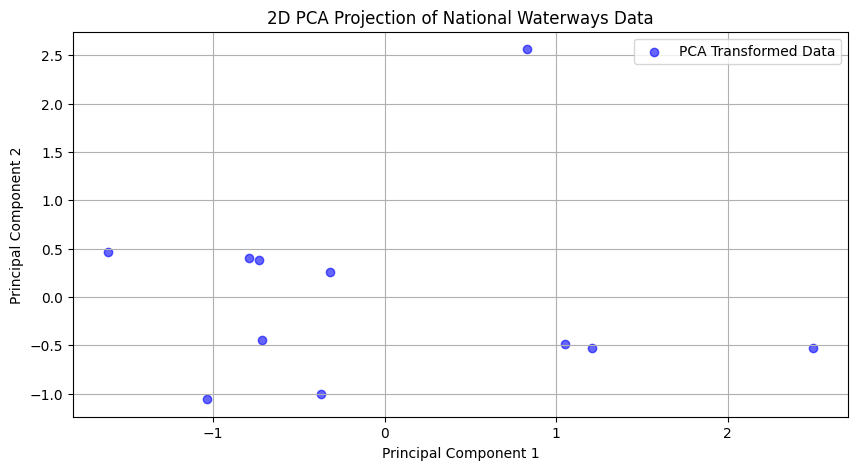

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], color='blue', alpha=0.6, label="PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of National Waterways Data")
plt.legend()
plt.grid()
plt.show()



*   We successfully reduced the dataset from 3 dimensions to 2 while keeping the maximum variance.

